In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfP4=pd.read_csv('P4ENERGY.csv')

### Machine learning

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold



from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
#transf les cat en valeurs num
#get dammies
dfP4D= pd.get_dummies(dfP4)

In [5]:
X=dfP4D.drop('SiteEnergyUseWN(kBtu)', axis=1)
y=dfP4D['SiteEnergyUseWN(kBtu)']

In [6]:
#stratification

In [7]:
y_s = pd.qcut(y, 10, labels=False)

In [8]:
[int(x) for x in y_s.values]

[7,
 7,
 9,
 7,
 8,
 8,
 7,
 7,
 8,
 8,
 9,
 7,
 9,
 8,
 9,
 8,
 9,
 7,
 8,
 9,
 9,
 5,
 8,
 2,
 6,
 8,
 6,
 6,
 7,
 0,
 9,
 3,
 7,
 5,
 7,
 4,
 8,
 8,
 2,
 6,
 8,
 6,
 9,
 6,
 7,
 6,
 7,
 7,
 7,
 5,
 6,
 5,
 9,
 8,
 5,
 8,
 7,
 8,
 2,
 8,
 9,
 9,
 7,
 9,
 9,
 4,
 1,
 9,
 6,
 9,
 5,
 6,
 6,
 5,
 7,
 6,
 7,
 6,
 5,
 8,
 5,
 7,
 8,
 9,
 8,
 4,
 7,
 5,
 9,
 8,
 7,
 6,
 4,
 6,
 6,
 7,
 8,
 9,
 5,
 9,
 7,
 7,
 5,
 3,
 9,
 4,
 7,
 5,
 8,
 8,
 4,
 3,
 8,
 7,
 0,
 8,
 8,
 7,
 3,
 9,
 8,
 6,
 9,
 8,
 4,
 9,
 7,
 8,
 9,
 9,
 0,
 8,
 3,
 8,
 5,
 4,
 6,
 7,
 6,
 9,
 5,
 9,
 9,
 9,
 9,
 8,
 8,
 2,
 6,
 8,
 6,
 9,
 9,
 9,
 9,
 9,
 5,
 7,
 6,
 8,
 9,
 7,
 9,
 9,
 6,
 6,
 9,
 8,
 0,
 9,
 9,
 3,
 5,
 9,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 8,
 5,
 7,
 9,
 9,
 6,
 6,
 7,
 1,
 9,
 8,
 0,
 9,
 7,
 9,
 8,
 6,
 9,
 8,
 5,
 9,
 4,
 8,
 9,
 9,
 9,
 9,
 8,
 6,
 1,
 5,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 7,
 6,
 9,
 7,
 7,
 9,
 8,
 4,
 7,
 0,
 9,
 5,
 7,
 5,
 8,
 8,
 7,
 9,
 9,
 9,
 6,
 6,
 8,
 8,
 7,
 4,
 9,
 9,
 9,


In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 , stratify=[int(x) for x in y_s.values])

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
y_train = np.array(y_train, dtype=np.int)

C:\Users\User\AppData\Local\Temp\ipykernel_13336\520895912.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(y_train, dtype=np.int)


### RIDGE

In [12]:
#Définition des hyperparamètres à explorer
param_grid = {'alpha':[0.1,1,10],
             'max_iter':[1000,2000,3000]
             }


In [13]:
#Création de l'estimateur RidgeCV

ridge_reg = Ridge()

In [14]:
#Création de l'objet de valdation croisée
kfolds=StratifiedKFold(n_splits=5)

In [15]:
#Recherche des meilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
clf_E1=GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
clf_E1.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000172E4128C10>,
             estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10], 'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [16]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results1=clf_E1.cv_results_
cv_results_df1=pd.DataFrame(cv_results1)

In [17]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected1= cv_results_df1[selected_columns]

In [18]:
cv_results_df1['mean_test_score'].max()

-0.5527231310562278

In [19]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model1 =clf_E1.best_estimator_

In [20]:
#Prédiction sur les données de test
y_test_pred1 = best_model1.predict(X_test)

In [21]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2_1=r2_score(y_test,y_test_pred1)

In [22]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model1)
print('Validation score r2: ',cv_results_selected1.mean_test_score.max())
print('Test r2: ', test_r2_1)

Meilleurs hyperparamètres trouvés:  Ridge(alpha=10, max_iter=1000)
Validation score r2:  -0.5527231310562278
Test r2:  0.5090958988899592


### ELASTICNET

In [23]:
#Définition des hyperparamètres à explorer
param_grid = {'alpha':[0.1,1,10],
              'l1_ratio':[0.2, 0.5, 0.8],
             'max_iter':[1000,2000,3000]
             }

In [24]:
#Création de l'estimateur ElasticNet
elastic_net = ElasticNet()

In [25]:
#Création de l'objet de valdation croisée
kfolds=StratifiedKFold(n_splits=5)

In [26]:
#Recherche descmeilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
clf_E=GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
clf_E.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000172E41EC820>,
             estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8],
                         'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [27]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=clf_E.cv_results_
cv_results_df=pd.DataFrame(cv_results)

In [28]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [29]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =clf_E.best_estimator_

In [30]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [31]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [32]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  ElasticNet(alpha=10, l1_ratio=0.8)
Validation score r2:  0.3099751376146085
Test r2:  0.42804301752083695


### Random Forest Regressor

In [33]:
#Définition des hyperparamètres à explorer
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [34]:
#Création de l'estimateur 
estimator = RandomForestRegressor()

In [35]:
#Recherche descmeilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
grid2=GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
grid2.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000172E512B740>,
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [36]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=grid2.cv_results_
cv_results_df=pd.DataFrame(cv_results)

In [37]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [38]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =grid2.best_estimator_

In [39]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [40]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [41]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=20)
Validation score r2:  0.6556900641531318
Test r2:  0.7088695066616695


In [42]:

importance = grid2.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.06088
Feature: 1, Score: 0.02535
Feature: 2, Score: 0.03818
Feature: 3, Score: 0.03467
Feature: 4, Score: 0.15315
Feature: 5, Score: 0.03231
Feature: 6, Score: 0.19284
Feature: 7, Score: 0.20061
Feature: 8, Score: 0.02077
Feature: 9, Score: 0.00016
Feature: 10, Score: 0.00598
Feature: 11, Score: 0.01100
Feature: 12, Score: 0.00566
Feature: 13, Score: 0.00152
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00013
Feature: 16, Score: 0.00024
Feature: 17, Score: 0.03279
Feature: 18, Score: 0.00160
Feature: 19, Score: 0.00033
Feature: 20, Score: 0.00526
Feature: 21, Score: 0.02214
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00331
Feature: 24, Score: 0.00627
Feature: 25, Score: 0.00549
Feature: 26, Score: 0.00009
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00032
Feature: 29, Score: 0.00043
Feature: 30, Score: 0.00024
Feature: 31, Score: 0.00041
Feature: 32, Score: 0.00447
Feature: 33, Score: 0.00307
Feature: 34, Score: 0.00371
Feature: 35, Score: 0.00283
Fe

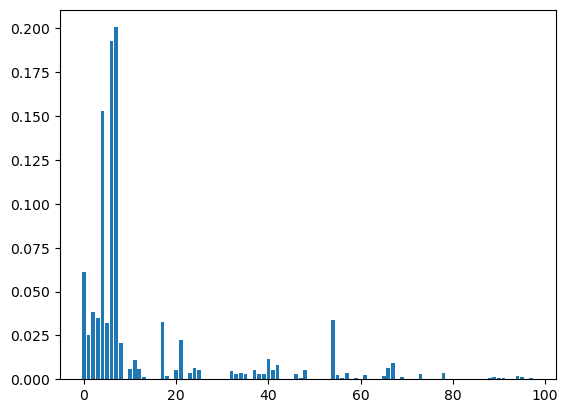

In [43]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

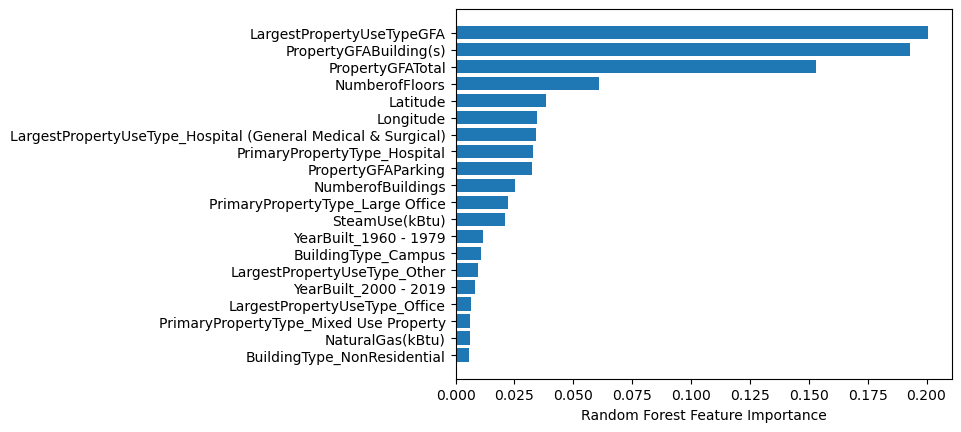

In [44]:
#plt.barh(X.columns, importance )

sorted_idx =importance.argsort()
plt.barh(X.columns[sorted_idx][-20:], importance[sorted_idx][-20:])
plt.xlabel("Random Forest Feature Importance")

In [45]:
importance[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.39388554e-07, 7.33927642e-07, 1.10357172e-06, 3.16615992e-06,
       3.93148169e-06, 6.52492799e-06, 6.73953603e-06, 7.64183423e-06,
       8.15790179e-06, 8.51467897e-06, 8.91665897e-06, 1.11101258e-05,
       1.17225325e-05, 1.47378144e-05, 1.60151668e-05, 1.68788075e-05,
       2.17823824e-05, 2.46743714e-05, 2.50887212e-05, 2.60789644e-05,
       3.10324263e-05, 3.20919427e-05, 3.96431086e-05, 6.76282777e-05,
       8.62601479e-05, 9.33168625e-05, 1.14300237e-04, 1.15246986e-04,
       1.27598326e-04, 1.59481804e-04, 1.61971272e-04, 1.63605293e-04,
       2.37577580e-04, 2.43825543e-04, 2.81688326e-04, 2.91941677e-04,
       3.21734077e-04, 3.25716136e-04, 3.51557813e-04, 4.05685049e-04,
       4.13646245e-04, 4.32572878e-04, 5.54933366e-04, 5.84984160e-04,
       6.69534272e-04, 7.07153462e-04, 7.87117351e-04, 7.89181326e-04,
       8.03770000e-04, 1.03567192e-03, 1.13197700e-03, 1.24551036e-03,
      

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


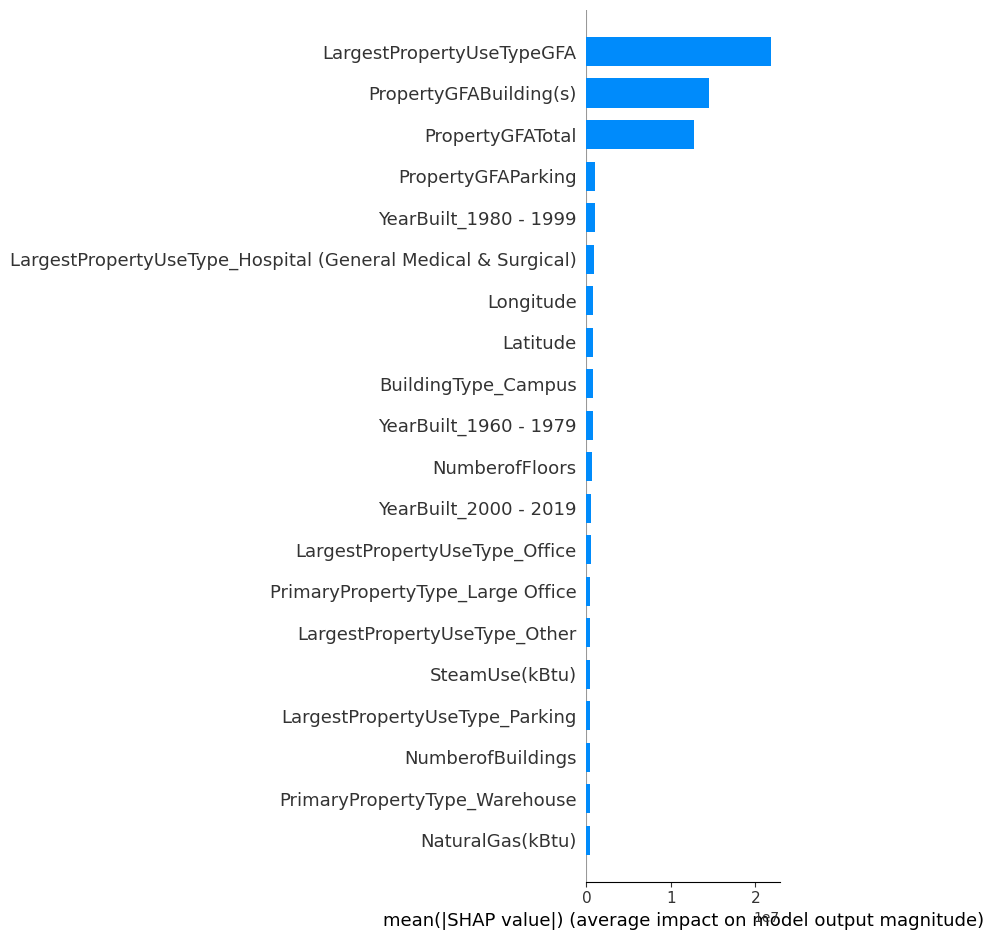

In [49]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")


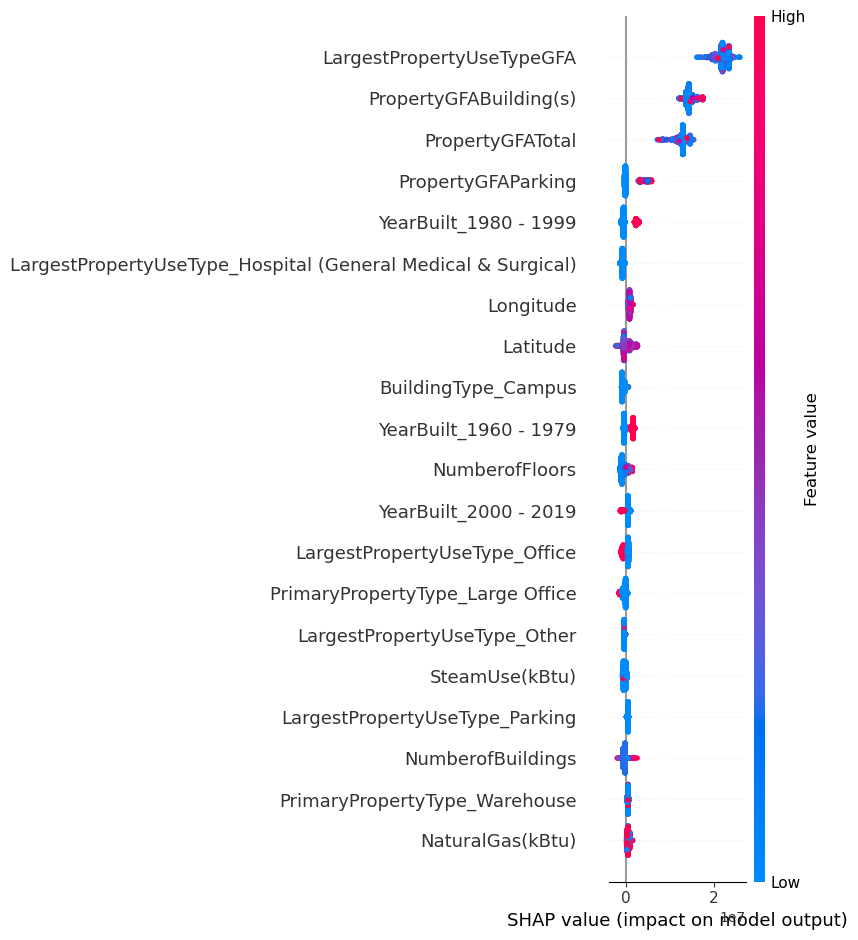

In [50]:
shap.summary_plot(shap_values, X)


In [51]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[476], features=X.loc[476], feature_names=X.columns)